In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_columns_clean.csv')

df.describe()

,table_id,column_name,id_file
count,14519,14488,14519
unique,333,5773,740
top,S4.T2,dataset,2409.01012v1
freq,931,505,125


In [38]:
# some set theory operations, using Jaccard similarity find tables with similar columns

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    if len(s1.union(s2)) == 0:
        return 0
    return len(s1.intersection(s2)) / len(s1.union(s2))


tables = df['table_id'].unique()
table_similarity = []
for i in range(len(tables)):
    for j in range(i + 1, len(tables)):
        table1 = df[df['table_id'] == tables[i]]['column_name'].tolist()
        table2 = df[df['table_id'] == tables[j]]['column_name'].tolist()
        similarity = jaccard_similarity(table1, table2)
        table_similarity.append((tables[i], tables[j], similarity, df[df['table_id'] == tables[i]]['id_file'].values[0], df[df['table_id'] == tables[j]]['id_file'].values[0]))
        

In [27]:

table_similarity = pd.DataFrame(table_similarity, columns=['table1', 'table2', 'similarity','id_file1','id_file2'])
table_similarity = table_similarity[table_similarity['similarity'] > 0]
table_similarity['is_same_file'] = table_similarity['id_file1'] == table_similarity['id_file2']
table_similarity = table_similarity.sort_values(by='similarity', ascending=False)

table_similarity

,table1,table2,similarity,id_file1,id_file2,is_same_file
54197,A1.T4.st3,A1.T4.st4,1.000000,2408.03772v1,2408.03772v1,True
54198,A1.T4.st3,A1.T5.st1,1.000000,2408.03772v1,2408.03772v1,True
55277,Pt0.Ax1.T3,Pt0.Ax1.T4,1.000000,2410.01356v1,2410.01356v1,True
55276,Pt0.Ax1.T2,Pt0.Ax1.T4,1.000000,2410.01356v1,2410.01356v1,True
55275,Pt0.Ax1.T2,Pt0.Ax1.T3,1.000000,2410.01356v1,2410.01356v1,True
...,...,...,...,...,...,...
10276,S4.T2,S3.T11,0.001439,2410.09012v1,2406.05933v1,False
10277,S4.T2,S3.T12,0.001437,2410.09012v1,2406.05933v1,False
10327,S4.T2,A1.T15,0.001435,2410.09012v1,2406.17918v2,False
10177,S4.T2,A3.T12,0.001429,2410.09012v1,2410.11972v1,False


In [28]:
# split the tables into two groups, same file and different files
same_file = table_similarity[table_similarity['is_same_file'] == True]

diff_file = table_similarity[table_similarity['is_same_file'] == False]

diff_file


,table1,table2,similarity,id_file1,id_file2,is_same_file
45336,S7.T9,S7.T10,0.727273,2406.07769v2,2407.13699v1,False
50642,S8.T12,S8.T13,0.700000,2407.00062v1,2407.09398v2,False
45195,S7.T8,S7.T10,0.666667,2406.07769v2,2407.13699v1,False
50550,S7.T11,S7.T10,0.666667,2407.00062v1,2407.13699v1,False
50458,A1.T17,A1.T18,0.600000,2406.17918v2,2407.13731v2,False
...,...,...,...,...,...,...
10276,S4.T2,S3.T11,0.001439,2410.09012v1,2406.05933v1,False
10277,S4.T2,S3.T12,0.001437,2410.09012v1,2406.05933v1,False
10327,S4.T2,A1.T15,0.001435,2410.09012v1,2406.17918v2,False
10177,S4.T2,A3.T12,0.001429,2410.09012v1,2410.11972v1,False


In [36]:
# print best similar tables stats
best_similar_tables = diff_file.head(30)
best_similar_tables

,table1,table2,similarity,id_file1,id_file2,is_same_file
45336,S7.T9,S7.T10,0.727273,2406.07769v2,2407.13699v1,False
50642,S8.T12,S8.T13,0.700000,2407.00062v1,2407.09398v2,False
45195,S7.T8,S7.T10,0.666667,2406.07769v2,2407.13699v1,False
50550,S7.T11,S7.T10,0.666667,2407.00062v1,2407.13699v1,False
50458,A1.T17,A1.T18,0.600000,2406.17918v2,2407.13731v2,False
40484,A4.T10,A5.T12,0.600000,2406.01631v2,2407.05441v2,False
45338,S7.T9,S8.T15,0.583333,2406.07769v2,2407.13699v1,False
45339,S7.T9,S8.T16,0.583333,2406.07769v2,2407.13699v1,False
45337,S7.T9,S8.T14,0.583333,2406.07769v2,2407.13699v1,False
44919,A2.T12,A2.T16,0.555556,2406.06357v1,2407.18957v4,False


In [37]:
#get the columns of the best similar tables
# key from (table1, id_file1) and (table2, id_file2)

for i, row in best_similar_tables.iterrows():
    
    table1 = df[(df['table_id'] == row['table1']) & (df['id_file'] == row['id_file1'])]['column_name'].tolist()
    table2 = df[(df['table_id'] == row['table2']) & (df['id_file'] == row['id_file2'])]['column_name'].tolist()
    
    # print the columns length of each table
    print(f"Table {row['table1']} length: {len(table1)}")
    print(f"Table {row['table2']} length: {len(table2)}")
    
    # union of the two tables
    union = list(set(table1).union(set(table2)))
    print(f"Union length: {len(union)}")
    
    # intersection of the two tables
    intersection = list(set(table1).intersection(set(table2)))
    print(f"Intersection length: {len(intersection)}")
    print("\n")

Table S7.T9 length: 3
Table S7.T10 length: 8
Union length: 11
Intersection length: 0


Table S8.T12 length: 4
Table S8.T13 length: 7
Union length: 11
Intersection length: 0


Table S7.T8 length: 4
Table S7.T10 length: 8
Union length: 12
Intersection length: 0


Table S7.T11 length: 4
Table S7.T10 length: 8
Union length: 12
Intersection length: 0


Table A1.T17 length: 2
Table A1.T18 length: 6
Union length: 8
Intersection length: 0


Table A4.T10 length: 1
Table A5.T12 length: 4
Union length: 5
Intersection length: 0


Table S7.T9 length: 3
Table S8.T15 length: 8
Union length: 11
Intersection length: 0


Table S7.T9 length: 3
Table S8.T16 length: 8
Union length: 11
Intersection length: 0


Table S7.T9 length: 3
Table S8.T14 length: 8
Union length: 11
Intersection length: 0


Table A2.T12 length: 4
Table A2.T16 length: 5
Union length: 9
Intersection length: 0


Table A7.T12 length: 5
Table A7.T11 length: 3
Union length: 8
Intersection length: 0


Table A8.T11 length: 5
Table A8.T10 lengt

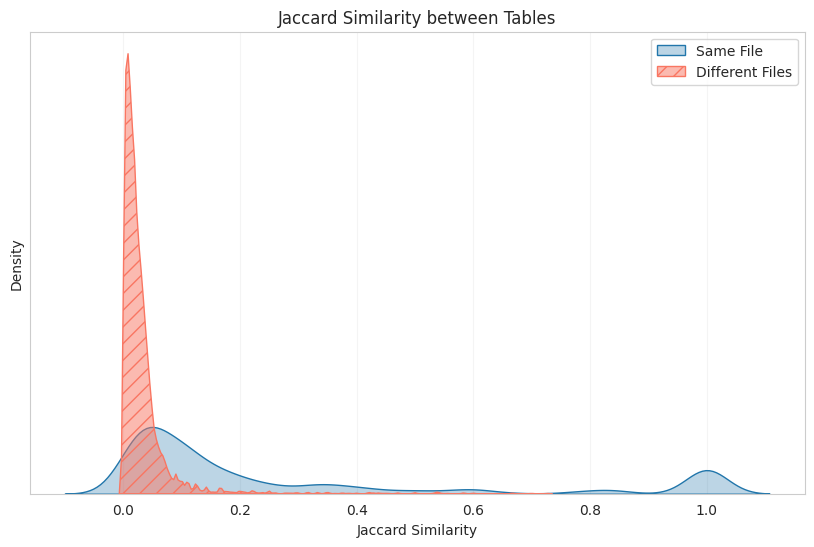

In [31]:
# plot the similarity between tables in the same file and different files
plt.figure(figsize=(10, 6))
sns.kdeplot(same_file['similarity'], color=palette[0], label='Same File', fill=True, bw_adjust=.35, alpha=0.3)
sns.kdeplot(diff_file['similarity'],  color=palette[1], label='Different Files', fill=True, bw_adjust=.35, alpha=0.5, hatch='//')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Density')
plt.yticks([])
plt.title('Jaccard Similarity between Tables')
plt.grid(alpha=0.2)
plt.legend()
plt.savefig('output/jaccard_similarity.png', dpi=300)